In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# load the data
data=pd.read_csv('heart.csv')

In [ ]:
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
data.shape

(918, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
data = data.drop_duplicates()

In [ ]:
data2=data.copy()

In [ ]:
data2.shape

(918, 12)

In [ ]:
data2.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

# as we can see there is no attribute with 1 unique vaiable so we can remove it and it seems all nomal

In [ ]:
data2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


#mean and the median are close for each variable so the distrubution are almost normal  
#the difference between the max and 75% and min with 25% is small for Age.  The variables that may potentially have outliers are RestingBP, Cholesterol, FastingBS, MaxHR, and Oldpeak

In [ ]:
data2.describe(include=[object])

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


#as we an see there is imbalances seen in the attibutes such as ChestPainType, RestingECG, ST_Slope.

1    508
0    410
Name: HeartDisease, dtype: int64


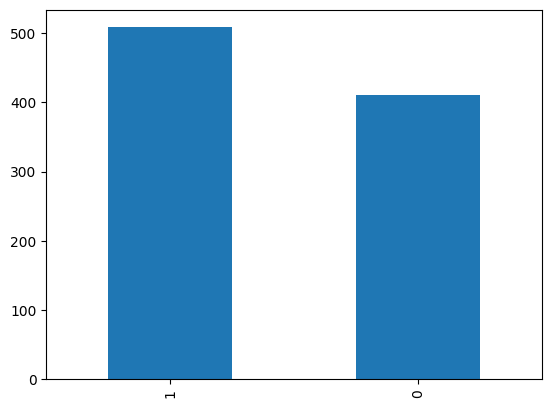

In [ ]:
data2['HeartDisease'].value_counts().plot(kind='bar')
print(data2['HeartDisease'].value_counts())

#almost balanced

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64


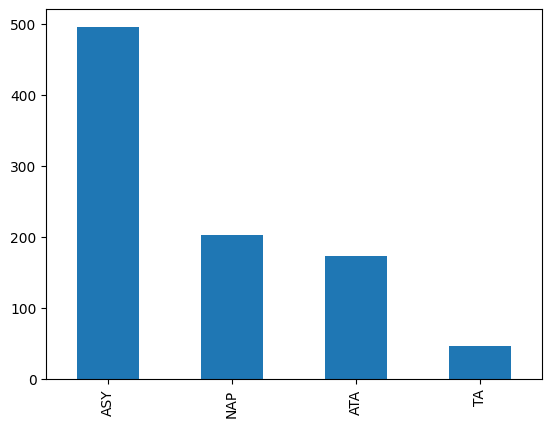

In [ ]:
#moving to visulization
data2['ChestPainType'].value_counts().plot(kind='bar')
print(data2['ChestPainType'].value_counts())

N    547
Y    371
Name: ExerciseAngina, dtype: int64


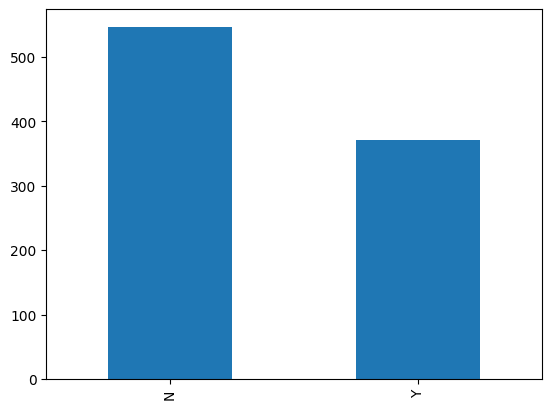

In [ ]:
data2['ExerciseAngina'].value_counts().plot(kind='bar')
print(data2['ExerciseAngina'].value_counts())

M    725
F    193
Name: Sex, dtype: int64


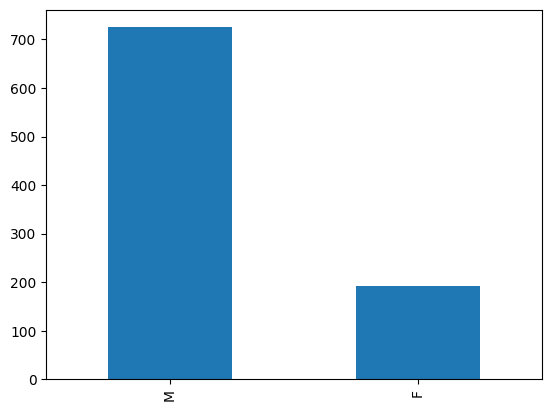

In [ ]:
data2['Sex'].value_counts().plot(kind='bar')
print(data2['Sex'].value_counts())

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64


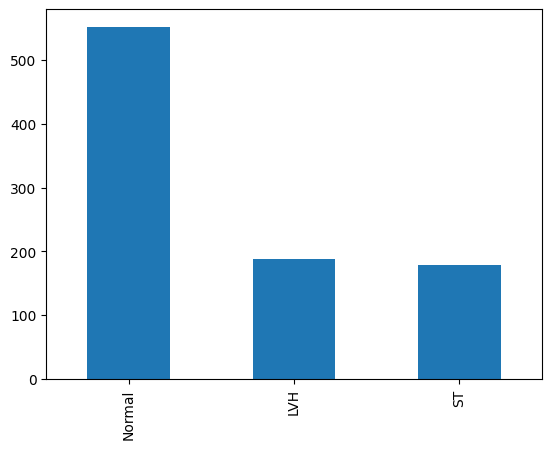

In [ ]:
data2['RestingECG'].value_counts().plot(kind='bar')
print(data2['RestingECG'].value_counts())

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64


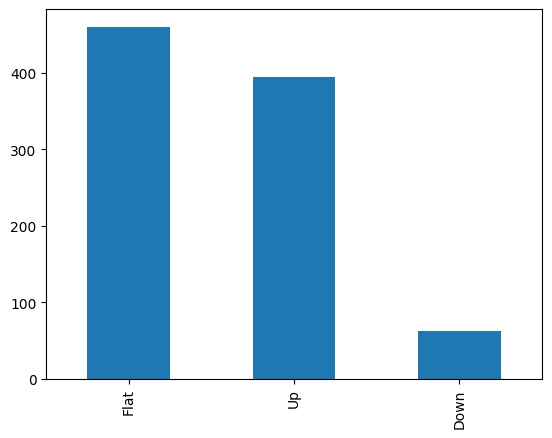

In [ ]:
data2['ST_Slope'].value_counts().plot(kind='bar')
print(data2['ST_Slope'].value_counts())

<Axes: xlabel='ChestPainType', ylabel='count'>

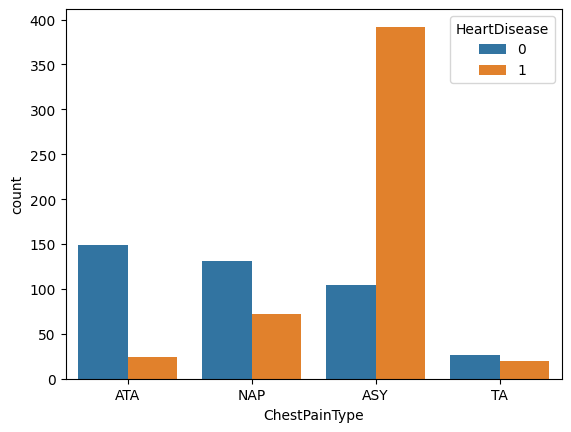

In [ ]:
sns.countplot(data=data2,x='ChestPainType',hue='HeartDisease')

#we can say that most of the people with ASY cheastpaintype have heart disease

<Axes: xlabel='Sex', ylabel='count'>

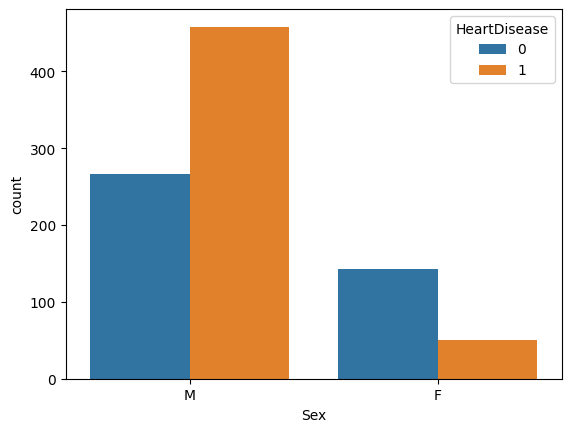

In [ ]:
sns.countplot(data=data2,x='Sex',hue='HeartDisease')

#we can say that most of the males have heart disease

<Axes: xlabel='ExerciseAngina', ylabel='count'>

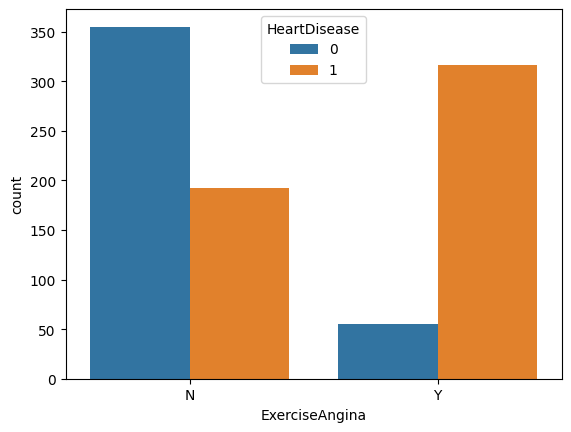

In [ ]:
sns.countplot(data=data2,x='ExerciseAngina',hue='HeartDisease')

#we can say that most of the people with induced angina  have heart disease

<Axes: xlabel='RestingECG', ylabel='count'>

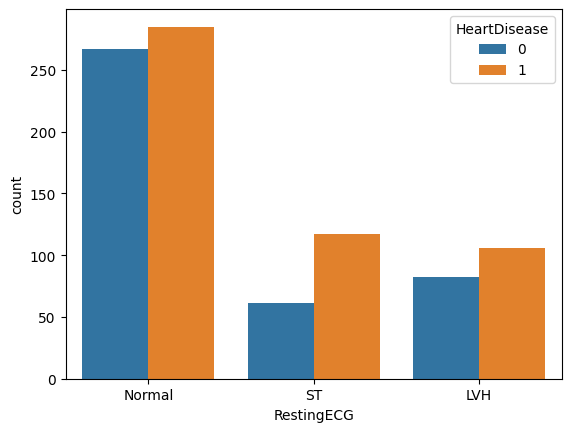

In [ ]:
sns.countplot(data=data2,x='RestingECG',hue='HeartDisease')

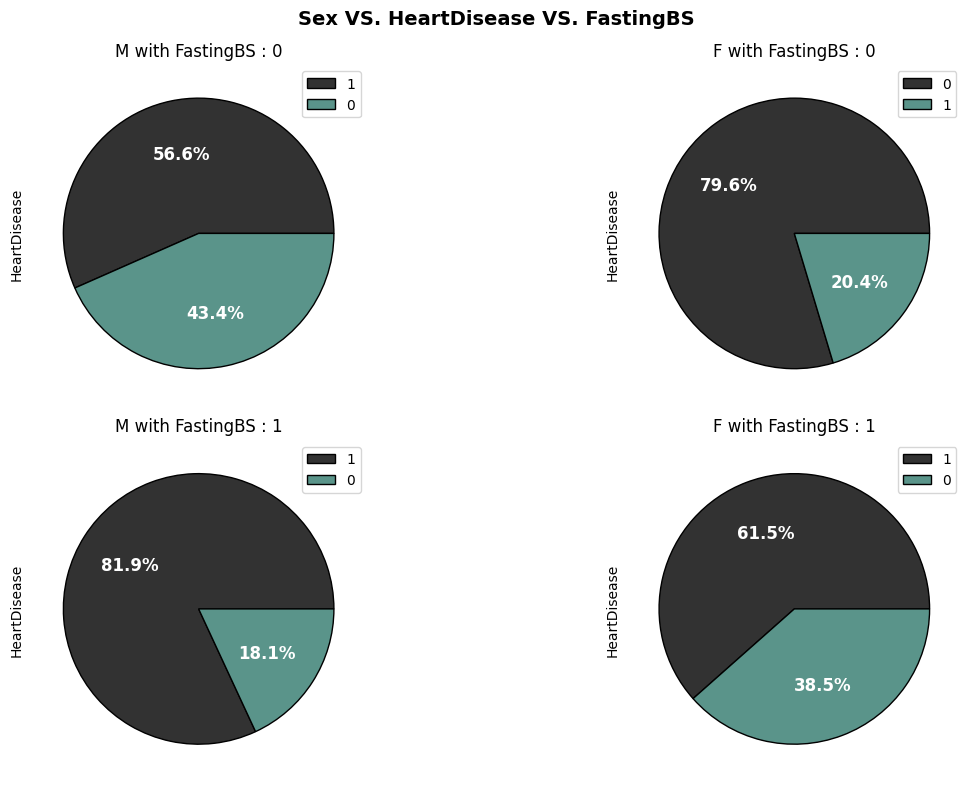

In [ ]:
fig = plt.figure(figsize=(14, 8))
subgroups = [('M', 0), ('F', 0), ('M', 1), ('F', 1)]

colors = ["#323232", '#5A948A']

for i, subgroup in enumerate(subgroups):
    sex, fastbs = subgroup

    ax = plt.subplot(2, 2, i + 1)
    data = data2[(data2['Sex'] == sex) & (data2['FastingBS'] == fastbs)]
    wedgeprops = {'linewidth': 1, 'edgecolor': 'black'}
    textprops = {'color': 'white', 'fontsize': 12, 'fontweight': 'bold'}
    data['HeartDisease'].value_counts().plot(kind='pie', colors=colors, wedgeprops=wedgeprops, textprops=textprops, autopct='%1.1f%%')

    plt.title(f'{sex} with FastingBS : {fastbs}')

    plt.legend()

fig.suptitle("Sex VS. HeartDisease VS. FastingBS", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
cat_cols = [ data2.columns[i] for i, j in enumerate(data2.dtypes) if j == 'object'] #extracting categorical data
print(cat_cols)


['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


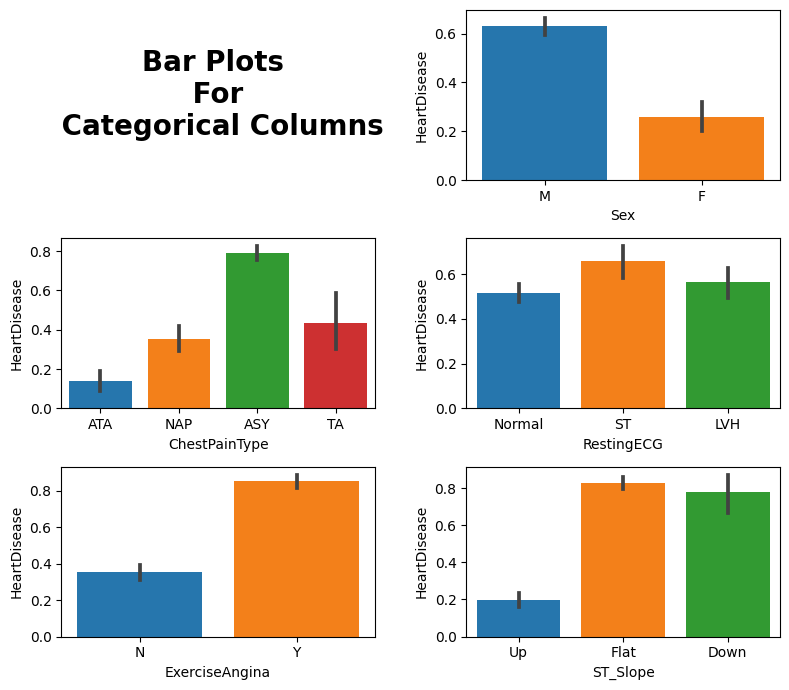

In [ ]:
plt.figure(figsize=(8,7))

ax = plt.subplot(3,2,1)
ax.text(0.5, 0.5, "Bar Plots \n For \n Categorical Columns", fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': 'black', 'ha': 'center', 'va': 'center'})
ax.axis('off')

for c, i in enumerate(range(2, 7)):
    plt.subplot(3,2,i)
    cat = cat_cols[c]
    sns.barplot(x = cat , y = 'HeartDisease', data = data2, saturation =0.9)


plt.tight_layout()
plt.show()

# as we can see the exeise yes , male,asy, flat and down slope,resting ecg may have a stong relationship with the disease

#we can see that being male with fastingBS 1 an indicate the heart disease

In [ ]:
data2.corr()

<ipython-input-26-41dc7ecd48ee>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data2.corr()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<ipython-input-27-e303bf38daa3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2.corr())


<Axes: >

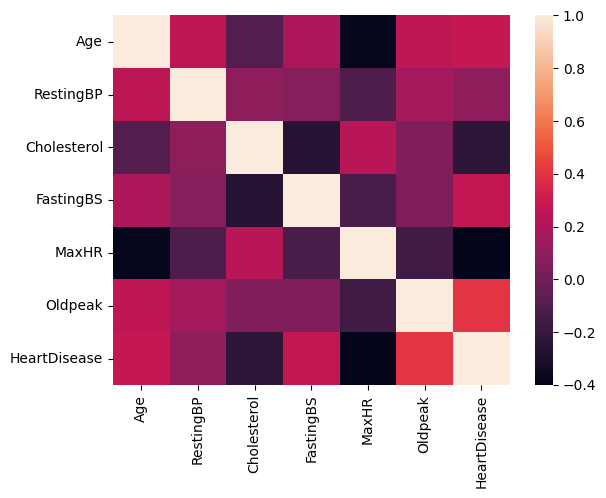

In [ ]:
sns.heatmap(data2.corr())

#Age and HeartDisease: There is a positive correlation of 0.282039 between Age and HeartDisease, suggesting a weak positive relationship between age and the presence of heart disease.
#RestingBP and HeartDisease: There is a positive correlation of 0.107589 between RestingBP and HeartDisease, indicating a weak positive relationship between resting blood pressure and the presence of heart disease.
#Cholesterol and HeartDisease: There is a negative correlation of -0.232741 between Cholesterol and HeartDisease, suggesting a weak negative relationship between cholesterol levels and the presence of heart disease.
#FastingBS and HeartDisease: There is a positive correlation of 0.267291 between FastingBS and HeartDisease, indicating a weak positive relationship between fasting blood sugar and the presence of heart disease.
#MaxHR and HeartDisease: There is a negative correlation of -0.400421 between MaxHR and HeartDisease, suggesting a moderate negative relationship between maximum heart rate achieved and the presence of heart disease.
#Oldpeak and HeartDisease: There is a positive correlation of 0.403951 between Oldpeak and HeartDisease, indicating a moderate positive relationship between ST depression induced by exercise relative to rest and the presence of heart diseas

In [ ]:
# Outliers Detections
X = pd.get_dummies(data2.iloc[:,:-1])
# the output spliting
y = data2.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3 ,stratify = y, random_state = 42) # the number 42 is optional we can use any number

In [ ]:
X_train=pd.get_dummies(X_train)
X_test=pd.get_dummies(X_test)

In [ ]:
def out_iqr(data2):
    out_dict = {}
    for column in data2.columns:
        q25, q75 = np.quantile(data2[column], 0.25), np.quantile(data2[column], 0.75)
        # calculate the IQR
        iqr = q75 - q25
        # calculate the outlier cutoff
        cut_off = iqr * 1.5
        # calculate the lower and upper bound value
        lower, upper = q25 - cut_off, q75 + cut_off
        # Calculate the number of records below and above lower and above bound value respectively
        df1 = data2[data2[column] > upper]
        df2 = data2[data2[column] < lower]
        out_dict[column] = {'IQR': iqr, 'Lower Bound': lower, 'Upper Bound': upper, 'Outliers': df1.shape[0]+ df2.shape[0]}
    return pd.DataFrame.from_dict(out_dict, orient='index')

In [ ]:
num2_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [ ]:
data_out = out_iqr(X_train[num2_cols])

data_out

,IQR,Lower Bound,Upper Bound,Outliers
Age,13.75,26.625,81.625,0
RestingBP,20.00,90.000,170.000,18
Cholesterol,88.50,47.500,401.500,121
FastingBS,0.00,0.000,0.000,143
MaxHR,37.00,62.500,210.500,0
Oldpeak,1.50,-2.250,3.750,12


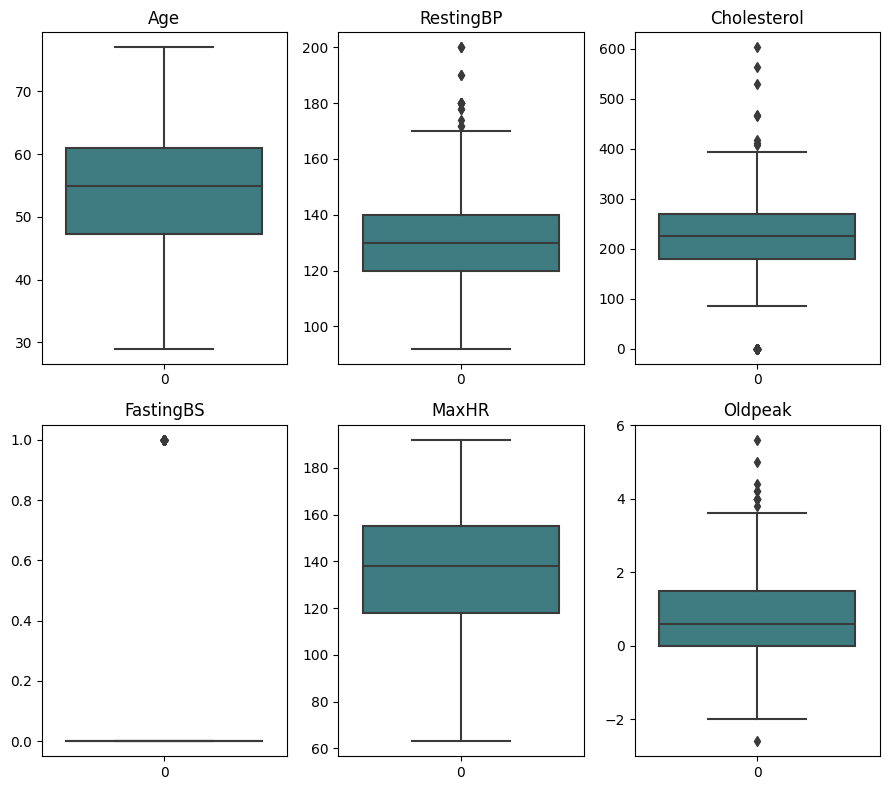

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 8))

for i, ax in enumerate(axs.flatten()):
    col = num2_cols[i]
    ax = sns.boxplot(X_train[col] ,  ax = ax , palette = 'crest' )
    ax.set_title(f"{col}")
plt.tight_layout()
plt.show()

#The box plots visualize the distribution of the data, including any outliers present in each column.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data2_std = pd.DataFrame(scaler.fit_transform(X_train[num2_cols]), columns = X_train[num2_cols].columns)

In [ ]:
data2_std

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,0.856064,-0.672618,-1.882352,1.868023,-0.082372,-1.563271
1,0.331343,0.435467,-1.882352,-0.535325,-0.629164,1.037503
2,0.331343,0.989510,0.489677,-0.535325,-1.722749,1.966351
3,1.905508,1.543553,-1.882352,-0.535325,-0.863504,0.665964
4,0.226399,2.097596,-1.882352,-0.535325,-0.511994,1.501927
...,...,...,...,...,...,...
637,-1.977432,-0.672618,-1.882352,1.868023,-0.238598,0.294425
638,0.961009,-0.118576,-1.882352,-0.535325,-0.980673,-0.820193
639,-0.613156,1.543553,1.178031,-0.535325,-1.722749,0.573079
640,0.646176,0.989510,0.517584,-0.535325,0.815930,1.594812


In [ ]:
data2_std.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02,6.420000e+02
mean,-2.102852e-16,-1.106764e-16,-8.854115e-17,4.427058e-17,4.454727e-16,2.490220e-17
std,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00,1.000780e+00
min,-2.607098e+00,-2.223938e+00,-1.882352e+00,-5.353253e-01,-2.855390e+00,-3.235197e+00
25%,-6.918642e-01,-6.726184e-01,-2.056527e-01,-5.353253e-01,-7.072772e-01,-8.201929e-01
50%,1.214542e-01,-1.185755e-01,2.106152e-01,-5.353253e-01,7.385468e-02,-2.628842e-01
75%,7.511201e-01,4.354673e-01,6.175810e-01,-5.353253e-01,7.378168e-01,5.730789e-01
max,2.430229e+00,3.759725e+00,3.726800e+00,1.868023e+00,2.182911e+00,4.381355e+00


# now we can see that there are no big diferences btw Q1 and min and Q3 and max so no appeant outliers

In [ ]:
#classification
#logistiegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

In [ ]:
clf=make_pipeline(StandardScaler(),LogisticRegression())
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [ ]:
print(clf['logisticregression'].coef_)
print(clf['logisticregression'].intercept_)

[[ 0.0560348  -0.00842852 -0.47350581  0.50948808 -0.22869933  0.22972061
  -0.22925188  0.22925188  0.54365166 -0.21038181 -0.36577622 -0.17322207
   0.14016097 -0.05909461 -0.06965183 -0.21210604  0.21210604  0.12568558
   0.55502556 -0.62706972]]
[0.36818642]


In [ ]:
#prediction on the test set
yhat=clf.predict(X_test)
yhat

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [ ]:
# evaluation of the model
accuracy=accuracy_score(y_test,yhat)
accuracy

0.8840579710144928

In [ ]:
precision_score(y_test,yhat,average='macro') # gives true positive values/(true positive+falsepositive)

0.8857142857142857

In [ ]:
recall_score(y_test,yhat,average='macro') # gives true positive values/(true positive+falsenegative)

0.87948350071736

Text(50.722222222222214, 0.5, 'Actual values')

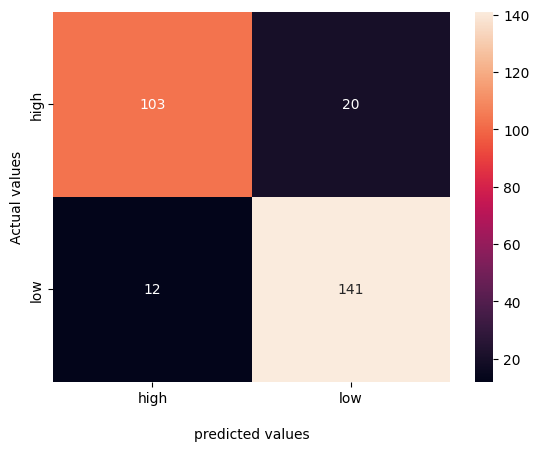

In [ ]:
table=sns.heatmap(confusion_matrix(y_test,yhat),xticklabels=['high','low'],yticklabels=['high','low'],annot=True,fmt='.0f')
table.set_xlabel('\npredicted values')
table.set_ylabel('Actual values')

#this gives a good preditions but we may look to other classiiers

In [ ]:
# support vector machine classifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
clf=make_pipeline(StandardScaler(),SVC())
scores=cross_val_score(clf,X,y,cv=5,scoring='f1_macro')
print(scores)
print(scores.mean())

[0.8854602  0.82060448 0.82395714 0.81398429 0.75746988]
0.8202951994211907


Text(50.722222222222214, 0.5, 'Actual values')

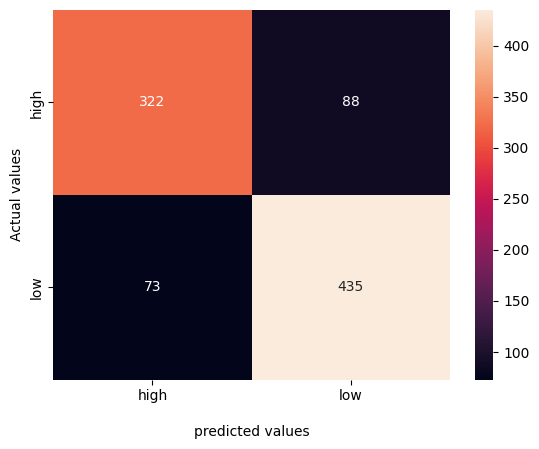

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), SVC())

# Perform cross-validation
y_pred = cross_val_predict(clf, X, y, cv=5)

# Compute the confusion matrix
table=sns.heatmap(confusion_matrix(y,y_pred),xticklabels=['high','low'],yticklabels=['high','low'],annot=True,fmt='.0f')
table.set_xlabel('\npredicted values')
table.set_ylabel('Actual values')


#seems that the previos one is better

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf=make_pipeline(StandardScaler(),DecisionTreeClassifier())
clf.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
yhat=clf.predict(X_test)
yhat

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
print('accuracy',accuracy_score(y_test,yhat))
print('precision',precision_score(y_test,yhat,average='macro'))
print('recall',recall_score(y_test,yhat,average='macro'))

accuracy 0.8115942028985508
precision 0.810032073189968
recall 0.8133269567989798


Text(50.722222222222214, 0.5, 'Actual values')

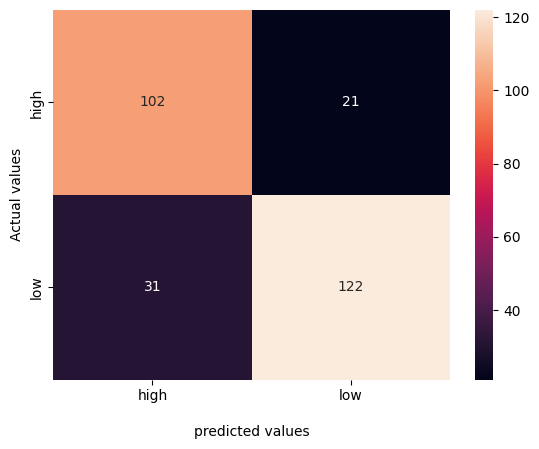

In [ ]:
table=sns.heatmap(confusion_matrix(y_test,yhat),xticklabels=['high','low'],yticklabels=['high','low'],annot=True,fmt='.0f')
table.set_xlabel('\npredicted values')
table.set_ylabel('Actual values')

#this is better than the previos classifier but we can check more one classifier

In [ ]:
from tables.file import parameters
# random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters={
    'n_estimators':(100,500,700)
}
rf=RandomForestClassifier()
clf=GridSearchCV(rf,parameters)
clf.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': (100, 500, 700)})

In [ ]:
pd.DataFrame(clf.cv_results_).transpose()

,0,1,2
mean_fit_time,0.212338,1.035221,1.647601
std_fit_time,0.004825,0.019619,0.254916
mean_score_time,0.01517,0.065509,0.095983
std_score_time,0.000603,0.004616,0.015437
param_n_estimators,100,500,700
params,{'n_estimators': 100},{'n_estimators': 500},{'n_estimators': 700}
split0_test_score,0.902174,0.902174,0.891304
split1_test_score,0.826087,0.826087,0.831522
split2_test_score,0.842391,0.826087,0.831522
split3_test_score,0.836066,0.846995,0.857923


Text(50.722222222222214, 0.5, 'Actual values')

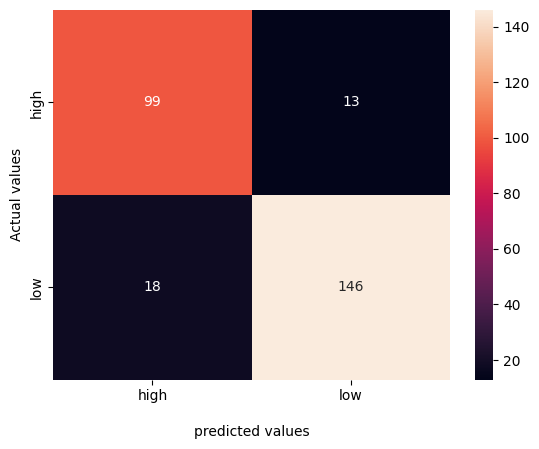

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined from your data

parameters = {
    'n_estimators': [100, 500, 700]
}

rf = RandomForestClassifier()
clf = GridSearchCV(rf, parameters)
clf.fit(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get the best estimator from GridSearchCV
best_estimator = clf.best_estimator_

# Fit the best estimator on the training data
best_estimator.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = best_estimator.predict(X_test)

# Compute the confusion matrix
table=sns.heatmap(confusion_matrix(y_test,y_pred),xticklabels=['high','low'],yticklabels=['high','low'],annot=True,fmt='.0f')
table.set_xlabel('\npredicted values')
table.set_ylabel('Actual values')


#this one the most accurace result

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


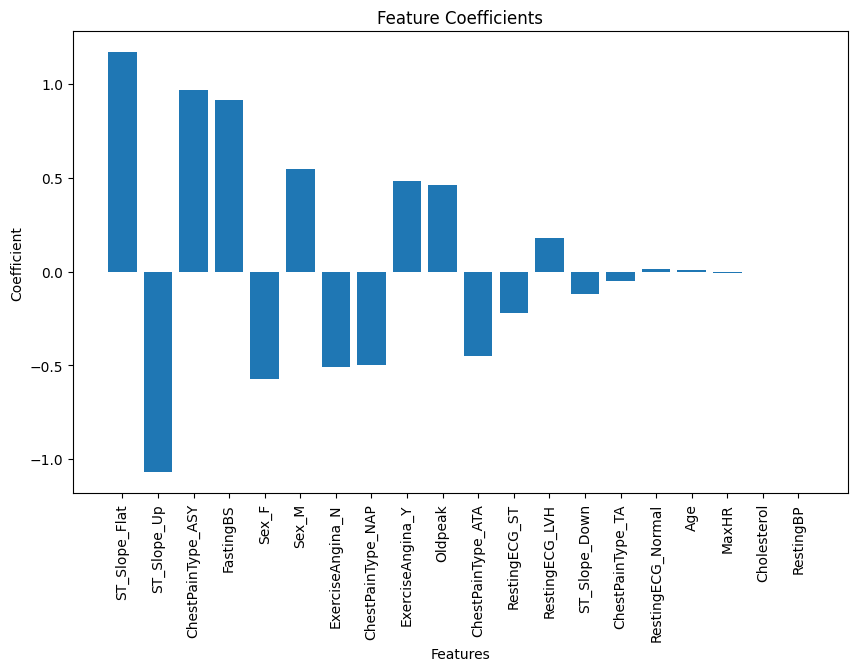

In [ ]:
import matplotlib.pyplot as plt

# Assuming `best` represents the best model (Logistic Regression) based on your evaluation
best_model = LogisticRegression()

# Fit the best model on the training data
best_model.fit(X_train, y_train)

# Get the feature coefficients
coefficients = best_model.coef_[0]

# Get the feature names
feature_names = X_train.columns

# Sort the feature coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the feature coefficients
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), sorted_coefficients, tick_label=sorted_feature_names)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Feature Coefficients')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


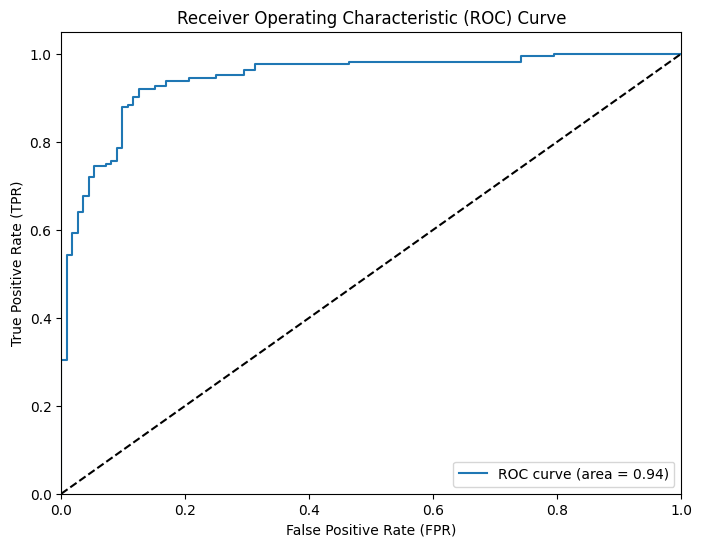

AUC-ROC score: 0.9435975609756098


In [ ]:
from sklearn.metrics import roc_curve, auc

# Train the Logistic Regression model
best_model.fit(X_train, y_train)

# Get the predicted probabilities for the test dataset
probs = best_model.predict_proba(X_test)
pred_probs = probs[:, 1]  # Probabilities of positive class

# Compute the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, pred_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate the Area Under the ROC Curve (AUC-ROC)
auc_score = auc(fpr, tpr)
print("AUC-ROC score:", auc_score)
